In [3]:
import numpy as np
import pandas as pd
import cv2
import random
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from tqdm import tqdm
from inkmlparser import InkMLParser
from boundingbox import BoundingBoxUtils
from ssdboxes import SSDBoxes


2023-09-15 23:32:01.582628: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-15 23:32:01.619005: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 23:32:02.224373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
folders = os.listdir("./data/train/")

equations = []
files = []

folders = [folders[0]]

for folder in folders:
    folder_files = os.listdir("./data/train/" + folder + "/")
    for ff in folder_files:
        files.append("./data/train/" + folder + "/" + ff)

for file in tqdm(files):
    equation = InkMLParser.inkml_to_labelled_image(file)
    if (not equation == None):
        equations.append(equation)

100%|██████████| 921/921 [00:06<00:00, 143.95it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


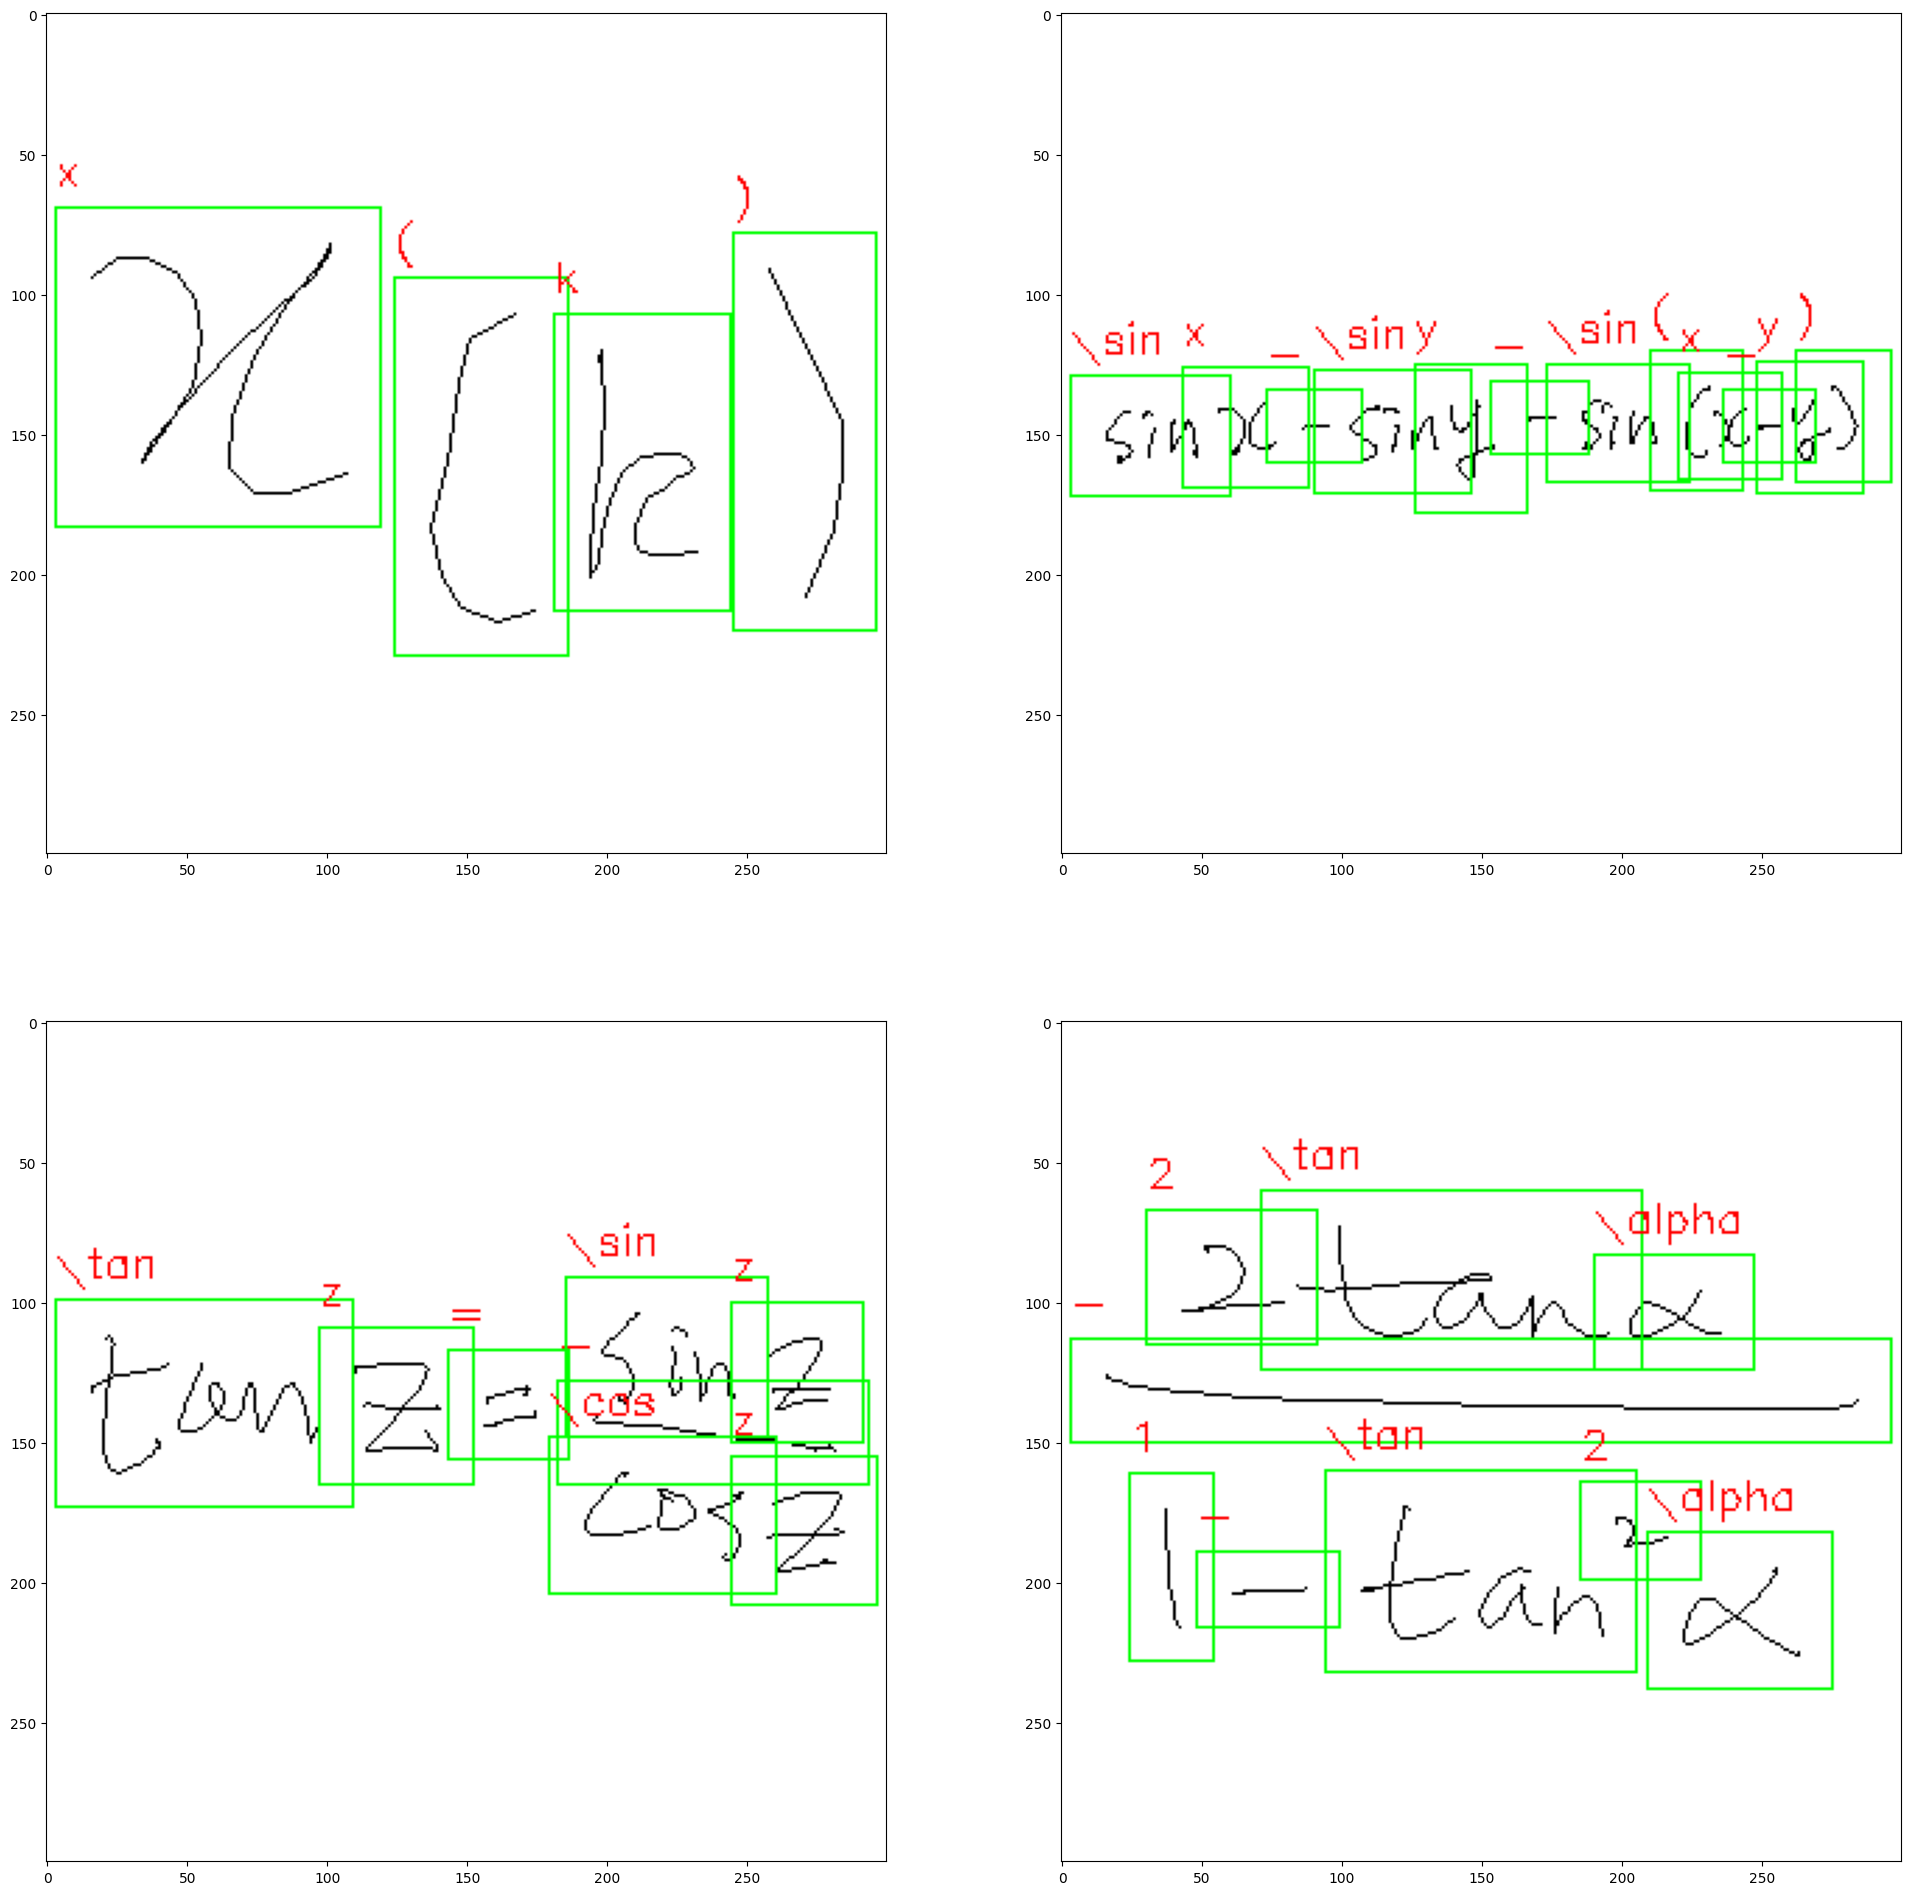

In [5]:

fig = plt.figure(figsize=([24, 24]))

for i in range(4):
    fig.add_subplot(2, 2, i + 1)

    index = random.randint(0, len(equations) - 1)
    equation = equations[index]
    
    img = BoundingBoxUtils.draw_bounding_box(1 - equation[0], equation[2], labels=equation[1])

    plt.imshow(img)